# Spot historico agregado por semanas y meses. Y comparativa con gas

## Objetivo

Prepar un dashboard que muestre la evolución del spot.
  
Hemos preparado un script tuit_dashboard_spot.py, para ejecutarlo en el servidor

[@walyt](https://twitter.com/walyt)

## Import

Tenemos un montón de librerias con las que vamos a trabajar, no he tenido ningún problema en instalar aquellas no disponibles en el entorno Anaconda con el que trabajo por medio de `pip install libreria` realizado desde un terminal abierto desde el entorno `env`.

In [1]:
import os.path as pth
import time
import calendar
import sys

import pandas as pd
import numpy as np

import requests
import json

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib import cm
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.dates import (YEARLY, MONTHLY, DateFormatter, WeekdayLocator, MonthLocator,DayLocator,
                              rrulewrapper, RRuleLocator, drange, num2date, date2num)
import matplotlib.patches as mpatches
import matplotlib.units as munits

import matplotlib.colors as colors
from matplotlib.lines import Line2D
from matplotlib.gridspec import GridSpec

from datetime import datetime,timedelta,date
import seaborn as sns
%matplotlib inline

sys.path.append("/Users/mharias/Documents/proyectos/mylibs") # directorio de acceso a librerías auxiliares

from pass_esios import token_esios
from herramientas import download_esios, download_ree
import locale

In [12]:
#formateamos pantalla
from IPython.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))
#pd.options.display.max_rows = 100
#pd.options.display.float_format = '{:,.2f}'.format

In [2]:
path_proyecto = '/Users/mharias/documents/proyectos/consumo_luz/'

# Curva de pato

In [3]:
indicadores = [805]


In [47]:
rango_fechas = pd.Series(pd.date_range(start='2018-01-01',end='2023-12-31',
                                       freq=timedelta(days=1)))

In [48]:
segmentos_fechas = (rango_fechas
 .groupby(np.arange(len(rango_fechas))//100)
 .agg(['first','last'])
)

In [8]:
lista=[]
for i in segmentos_fechas.index:
    inicio = segmentos_fechas.loc[i,'first'].strftime("%Y-%m-%d")
    fin = segmentos_fechas.loc[i,'last'].strftime("%Y-%m-%d")
    print (f"Descargando desde {inicio}, hasta {fin}")
    lista.append(download_esios(token_esios,indicadores,inicio,fin,time_trunc='hour'))

Descargando desde 2018-01-01, hasta 2018-04-10
Descargando desde 2018-04-11, hasta 2018-07-19
Descargando desde 2018-07-20, hasta 2018-10-27
Descargando desde 2018-10-28, hasta 2019-02-04
Descargando desde 2019-02-05, hasta 2019-05-15
Descargando desde 2019-05-16, hasta 2019-08-23
Descargando desde 2019-08-24, hasta 2019-12-01
Descargando desde 2019-12-02, hasta 2020-03-10
Descargando desde 2020-03-11, hasta 2020-06-18
Descargando desde 2020-06-19, hasta 2020-09-26
Descargando desde 2020-09-27, hasta 2021-01-04
Descargando desde 2021-01-05, hasta 2021-04-14
Descargando desde 2021-04-15, hasta 2021-07-23
Descargando desde 2021-07-24, hasta 2021-10-31
Descargando desde 2021-11-01, hasta 2022-02-08
Descargando desde 2022-02-09, hasta 2022-05-19
Descargando desde 2022-05-20, hasta 2022-08-27
Descargando desde 2022-08-28, hasta 2022-12-05
Descargando desde 2022-12-06, hasta 2023-03-15
Descargando desde 2023-03-16, hasta 2023-06-23
Descargando desde 2023-06-24, hasta 2023-10-01
Descargando d

In [9]:
raw = pd.concat(lista, ignore_index=True )

In [10]:
raw

,value,datetime,datetime_utc,tz_time,geo_id,geo_name,name,short_name
0,6.74,2018-01-01T00:00:00.000+01:00,2017-12-31T23:00:00Z,2017-12-31T23:00:00.000Z,8741,Península,Precio medio horario componente mercado diario,Mercado Diario
1,4.74,2018-01-01T01:00:00.000+01:00,2018-01-01T00:00:00Z,2018-01-01T00:00:00.000Z,8741,Península,Precio medio horario componente mercado diario,Mercado Diario
2,3.66,2018-01-01T02:00:00.000+01:00,2018-01-01T01:00:00Z,2018-01-01T01:00:00.000Z,8741,Península,Precio medio horario componente mercado diario,Mercado Diario
3,2.30,2018-01-01T03:00:00.000+01:00,2018-01-01T02:00:00Z,2018-01-01T02:00:00.000Z,8741,Península,Precio medio horario componente mercado diario,Mercado Diario
4,2.30,2018-01-01T04:00:00.000+01:00,2018-01-01T03:00:00Z,2018-01-01T03:00:00.000Z,8741,Península,Precio medio horario componente mercado diario,Mercado Diario
...,...,...,...,...,...,...,...,...
53203,96.80,2024-01-26T19:00:00.000+01:00,2024-01-26T18:00:00Z,2024-01-26T18:00:00.000Z,8741,Península,Precio medio horario componente mercado diario,Mercado Diario
53204,111.07,2024-01-26T20:00:00.000+01:00,2024-01-26T19:00:00Z,2024-01-26T19:00:00.000Z,8741,Península,Precio medio horario componente mercado diario,Mercado Diario
53205,93.00,2024-01-26T21:00:00.000+01:00,2024-01-26T20:00:00Z,2024-01-26T20:00:00.000Z,8741,Península,Precio medio horario componente mercado diario,Mercado Diario
53206,74.98,2024-01-26T22:00:00.000+01:00,2024-01-26T21:00:00Z,2024-01-26T21:00:00.000Z,8741,Península,Precio medio horario componente mercado diario,Mercado Diario


Efectivamente esta serie de datos se corresponde con el Componente horario del mercado diario:

In [58]:
print (f"Descripción del id {indicadores[0]}: {raw.name.unique()[0]}")

Descripción del id 805: Precio medio horario componente mercado diario 


In [60]:
data = (raw
 .assign(hora = lambda df_: pd #formateamos campo fecha, desde un str con diferencia horaria a un naive
                      .to_datetime(df_['datetime'],utc=True)  # con la fecha local
                      .dt
                      .tz_convert('Europe/Madrid')
                      .dt
                      .tz_localize(None)
        )
 .rename({'value':'coste'},axis=1) # cambiamos el nombre de la columna value por coste, solo por capricho
 .loc[:,['hora','coste']] # nos quedamos con estas dos columnas
 .assign(year = lambda df_ : df_['hora'].dt.year)  # sacamos el año
 .assign(hora = lambda df_ : df_['hora'].dt.hour)  #sacamos la hora
 .groupby(['hora','year']).mean()  #agrupamos por año y hora y sacamos la media de las 365 valores horarios del año
 .reset_index() # necesario para mover año y hora del index a las columnas
 .assign (coste_norm = lambda df_ : df_.groupby(['year']).transform(lambda x : x/x.iloc[0]).coste)
        # con esta ultima funcion normalizamos los valores al


 

                 )

In [61]:
data

,hora,year,coste,coste_norm
0,0,2018,56.209726,1.000000
1,0,2019,47.582411,1.000000
2,0,2020,33.451776,1.000000
3,0,2021,112.961863,1.000000
4,0,2022,176.798712,1.000000
...,...,...,...,...
163,23,2020,34.903388,1.043394
164,23,2021,115.029397,1.018303
165,23,2022,177.985644,1.006713
166,23,2023,100.106027,1.058315


/var/folders/_p/bc_h4mbs0350g3s_n60vsd3c0000gp/T/ipykernel_2127/4176561839.py:13: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  scatter = sns.lineplot(data=data,


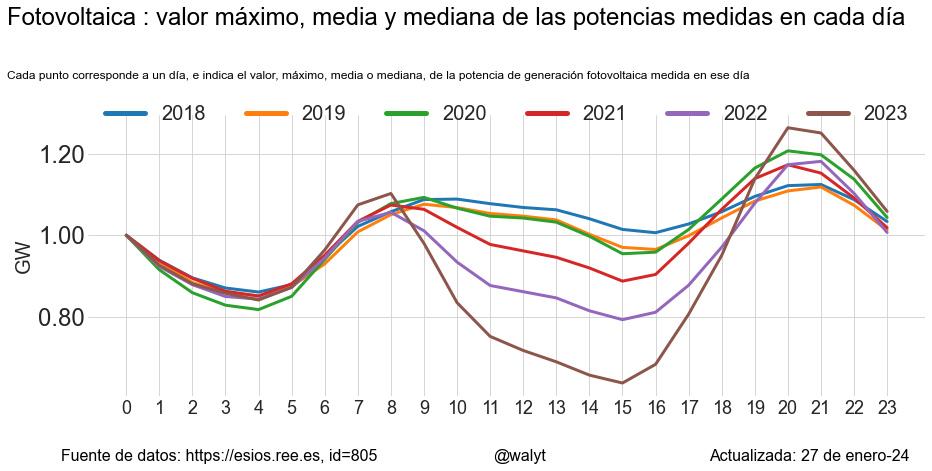

In [46]:
locale.setlocale(locale.LC_ALL,'es_ES.UTF-8')
titulo =f"La forma de pato se va a"
fuente = f'https://esios.ree.es, id={indicadores[0]}'
autor='@walyt'
path_proyecto = '/Users/mharias/documents/proyectos/consumo_luz/'
renovables = ['Eólica','Solar fotovoltaica']

color=sns.color_palette('tab10')

f, ax = plt.subplots(figsize=(15,6))

sns.set_style(style='white')
scatter = sns.lineplot(data=data,
            x='hora',
            y='coste_norm',
            hue='year',
            palette=color,
            lw=3
            
            #label=['Máximo','Media','Mediana']
              )

ax.xaxis.set_tick_params(labelsize=18,width=0,rotation=0,pad=0)
ax.yaxis.set_tick_params(labelsize=24,width=0,rotation=0,pad=-0)
#ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:f'{v/1000:,.0f}GWh'.replace(',','.')))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:f'{v:,.2f}'.replace(',','.')))
#ax.set_ylim((0,1.4))

sns.despine(left=True, bottom=True)
ax.grid(visible=True,axis='both',zorder=0)


ax.set_xlabel('',fontsize=12)
ax.set_ylabel('GW',fontsize=20)
f.subplots_adjust(top=.75,bottom=0.1)

ax.set_xticks(range(0,24))


#leyenda 
handles, labels = ax.get_legend_handles_labels()
leyenda=ax.legend(handles,
          labels,
                  fontsize=20,
                  markerscale=2.5,
                  loc=9,
                  ncol=len(handles),
                  frameon=False,
                  bbox_to_anchor=(.5,1.1))
for line in leyenda.get_lines():
    line.set_linewidth(5)
    
#textos auxiliares
f.suptitle('{}'.format(titulo),fontsize=24,color='black',y=1.0,x=0.05,ha='left')
f.text(0.05, .84, 'Cada punto corresponde a un día, e indica el valor, máximo, media o mediana, de la potencia de generación fotovoltaica medida en ese día', 
       horizontalalignment='left',
       verticalalignment='center',
       fontsize=12,color='black')

f.text(0.1, -0.04, 'Fuente de datos: {}'.format(fuente), horizontalalignment='left',
             verticalalignment='center', fontsize=16,color='black')
f.text(0.5,-0.04,'{}'.format(autor),
                 verticalalignment='center',fontsize=16,horizontalalignment='left',color='black')

f.text(0.7,-0.04,f'Actualizada: {datetime.today().strftime("%-d de %B-%y")}',
       verticalalignment='center',fontsize=16,horizontalalignment='left',color='black')



path_imagen = '{}img/figura_pato.png'.format(path_proyecto)
f.savefig(path_imagen,dpi=288,bbox_inches='tight')

In [23]:
len(handles)

6